In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/cities_r2.csv")
data

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


**How many missing values are there in each column?**

In [2]:
# Check for missing values
print(data.isnull().sum())
# Handle missing values
data.dropna(inplace=True)

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


**How many duplicate rows are in the data?**

In [3]:
duplicate_rows_count = data.duplicated().sum()
print(duplicate_rows_count)
data.drop_duplicates(inplace=True)

0


**How many outliers are there in each numerical column using the z-score method?**

In [4]:
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
outliers_count = (z_scores >= 3).sum(axis=0)
print(outliers_count)

state_code                         0
dist_code                         12
population_total                   8
population_male                    8
population_female                  8
0-6_population_total               8
0-6_population_male                8
0-6_population_female              8
literates_total                    8
literates_male                     8
literates_female                   8
sex_ratio                          4
child_sex_ratio                    1
effective_literacy_rate_total      5
effective_literacy_rate_male       6
effective_literacy_rate_female     2
total_graduates                    8
male_graduates                     8
female_graduates                   9
dtype: int64


In [5]:
# Calculate summary statistics
print(data.describe())

       state_code   dist_code  population_total  population_male  \
count  493.000000  493.000000      4.930000e+02     4.930000e+02   
mean    18.643002   16.782961      4.481124e+05     2.343468e+05   
std      9.297168   15.566131      1.033228e+06     5.487786e+05   
min      1.000000    1.000000      1.000360e+05     5.020100e+04   
25%      9.000000    7.000000      1.261420e+05     6.638400e+04   
50%     19.000000   13.000000      1.841330e+05     9.665500e+04   
75%     27.000000   21.000000      3.490330e+05     1.750550e+05   
max     35.000000   99.000000      1.247845e+07     6.736815e+06   

       population_female  0-6_population_total  0-6_population_male  \
count       4.930000e+02          4.930000e+02           493.000000   
mean        2.137656e+05          4.709285e+04         24849.527383   
std         4.848622e+05          1.050279e+05         55535.310272   
min         4.512600e+04          6.547000e+03          3406.000000   
25%         6.041100e+04        

In [6]:
# Calculate mean for numerical variables
mean_values = data.mean()
print("Mean Values:",mean_values)

Mean Values: state_code                            18.643002
dist_code                             16.782961
population_total                  448112.373225
population_male                   234346.789047
population_female                 213765.584178
0-6_population_total               47092.847870
0-6_population_male                24849.527383
0-6_population_female              22243.320487
literates_total                   346152.728195
literates_male                    189438.440162
literates_female                  156714.288032
sex_ratio                            930.294118
child_sex_ratio                      902.332657
effective_literacy_rate_total         85.131460
effective_literacy_rate_male          89.920162
effective_literacy_rate_female        79.967181
total_graduates                    66202.356998
male_graduates                     37715.561866
female_graduates                   28486.795132
dtype: float64


<ipython-input-6-bac197615e86>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


In [7]:
# Calculate median for numerical variables
median_values = data.median()
print("Median Values:",median_values)

Median Values: state_code                            19.00
dist_code                             13.00
population_total                  184133.00
population_male                    96655.00
population_female                  87768.00
0-6_population_total               19440.00
0-6_population_male                10342.00
0-6_population_female               9172.00
literates_total                   141329.00
literates_male                     75906.00
literates_female                   63836.00
sex_ratio                            922.00
child_sex_ratio                      903.00
effective_literacy_rate_total         85.97
effective_literacy_rate_male          91.18
effective_literacy_rate_female        80.92
total_graduates                    23959.00
male_graduates                     14049.00
female_graduates                    9558.00
dtype: float64


<ipython-input-7-2dcc3239f200>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = data.median()


In [8]:
# Calculate mode for numerical variables (mode() can return multiple modes, so we need to handle it accordingly)
mode_values = data.mode().iloc[0]  # Select the first row (most frequent values) as the mode
print("Mode Values:",mode_values)

Mode Values: name_of_city                                Aurangabad 
state_code                                          9.0
state_name                                UTTAR PRADESH
dist_code                                          11.0
population_total                                 100036
population_male                                   50201
population_female                                 45126
0-6_population_total                            13040.0
0-6_population_male                              6476.0
0-6_population_female                            4506.0
literates_total                                111514.0
literates_male                                    34751
literates_female                                35034.0
sex_ratio                                         897.0
child_sex_ratio                                   947.0
effective_literacy_rate_total                     76.58
effective_literacy_rate_male                      91.54
effective_literacy_rate_female     

In [9]:
# Calculate standard deviation for numerical variables
std_values = data.std()
print("Standard Deviation:",std_values)

Standard Deviation: state_code                        9.297168e+00
dist_code                         1.556613e+01
population_total                  1.033228e+06
population_male                   5.487786e+05
population_female                 4.848622e+05
0-6_population_total              1.050279e+05
0-6_population_male               5.553531e+04
0-6_population_female             4.952324e+04
literates_total                   8.220952e+05
literates_male                    4.534753e+05
literates_female                  3.690677e+05
sex_ratio                         5.584911e+01
child_sex_ratio                   4.979469e+01
effective_literacy_rate_total     6.186345e+00
effective_literacy_rate_male      5.377492e+00
effective_literacy_rate_female    7.577825e+00
total_graduates                   1.778187e+05
male_graduates                    9.849574e+04
female_graduates                  7.951556e+04
dtype: float64


<ipython-input-9-b8ed959eab5d>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = data.std()


**Which are the top 10 most populour cities?**

In [10]:
# Sample Solution Code
top_populour_cities = data.nlargest(10, 'population_total')
print(top_populour_cities[['name_of_city', 'population_total']])


           name_of_city  population_total
185     Greater Mumbai           12478447
141              Delhi           11007835
72            Bengaluru           8425970
184  Greater Hyderabad            6809970
7            Ahmadabad            5570585
119            Chennai            4681087
274            Kolkata            4486679
449              Surat            4462002
380               Pune            3115431
225             Jaipur            3073350


**What is the distribution of literacy rates across cities?**

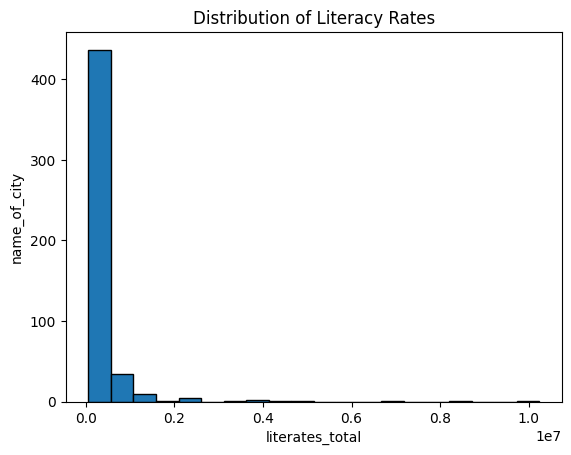

In [11]:
# Sample Solution Code
import matplotlib.pyplot as plt

plt.hist(data['literates_total'], bins=20, edgecolor='k')
plt.xlabel('literates_total')
plt.ylabel('name_of_city')
plt.title('Distribution of Literacy Rates')
plt.show()


**Correlation of our data:**

<ipython-input-12-fe7f6496c984>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


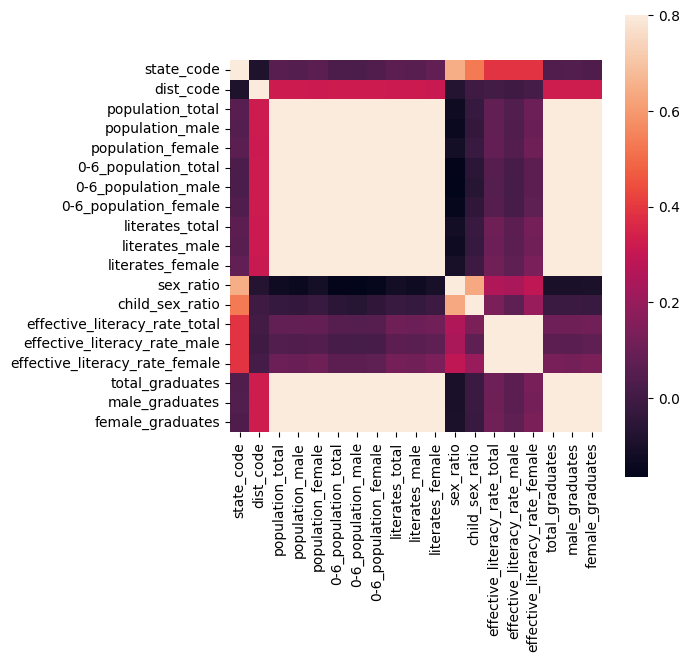

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr=data.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, vmax=.8, square=True);

**From the bellow plot we can conclude that the states which lave least literacy rate is Jammu and Kashmir and Uttar Pradesh.Even though the cities taken from uttar pradesh are high it stood behind in literacy rates compared to other cities.**

Text(0, 0.5, 'States')

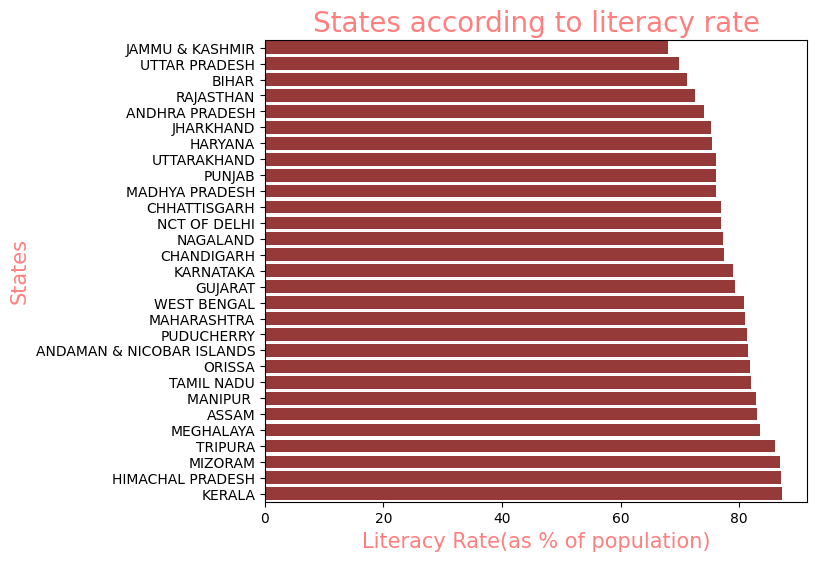

In [13]:
lit_by_states  = data.groupby('state_name').agg({'literates_total': np.sum})
pop_by_states  = data.groupby('state_name').agg({'population_total': np.sum})
literate_rate = lit_by_states.literates_total * 100 / pop_by_states.population_total
literate_rate = literate_rate.sort_values(ascending=True)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=literate_rate, y=literate_rate.index,color='brown')
ax.set_title('States according to literacy rate', size=20, alpha=0.5, color='red')
ax.set_xlabel('Literacy Rate(as % of population)', size=15, alpha=0.5, color='red')
ax.set_ylabel('States', size=15, alpha=0.5, color='red')

**From the below plot we can say that uttarpradesh has highest number of cities i.e 63 and followed by west Bengal. Least number of cities were taken from Andaman and Nicobar islands and followed by Nagaland**

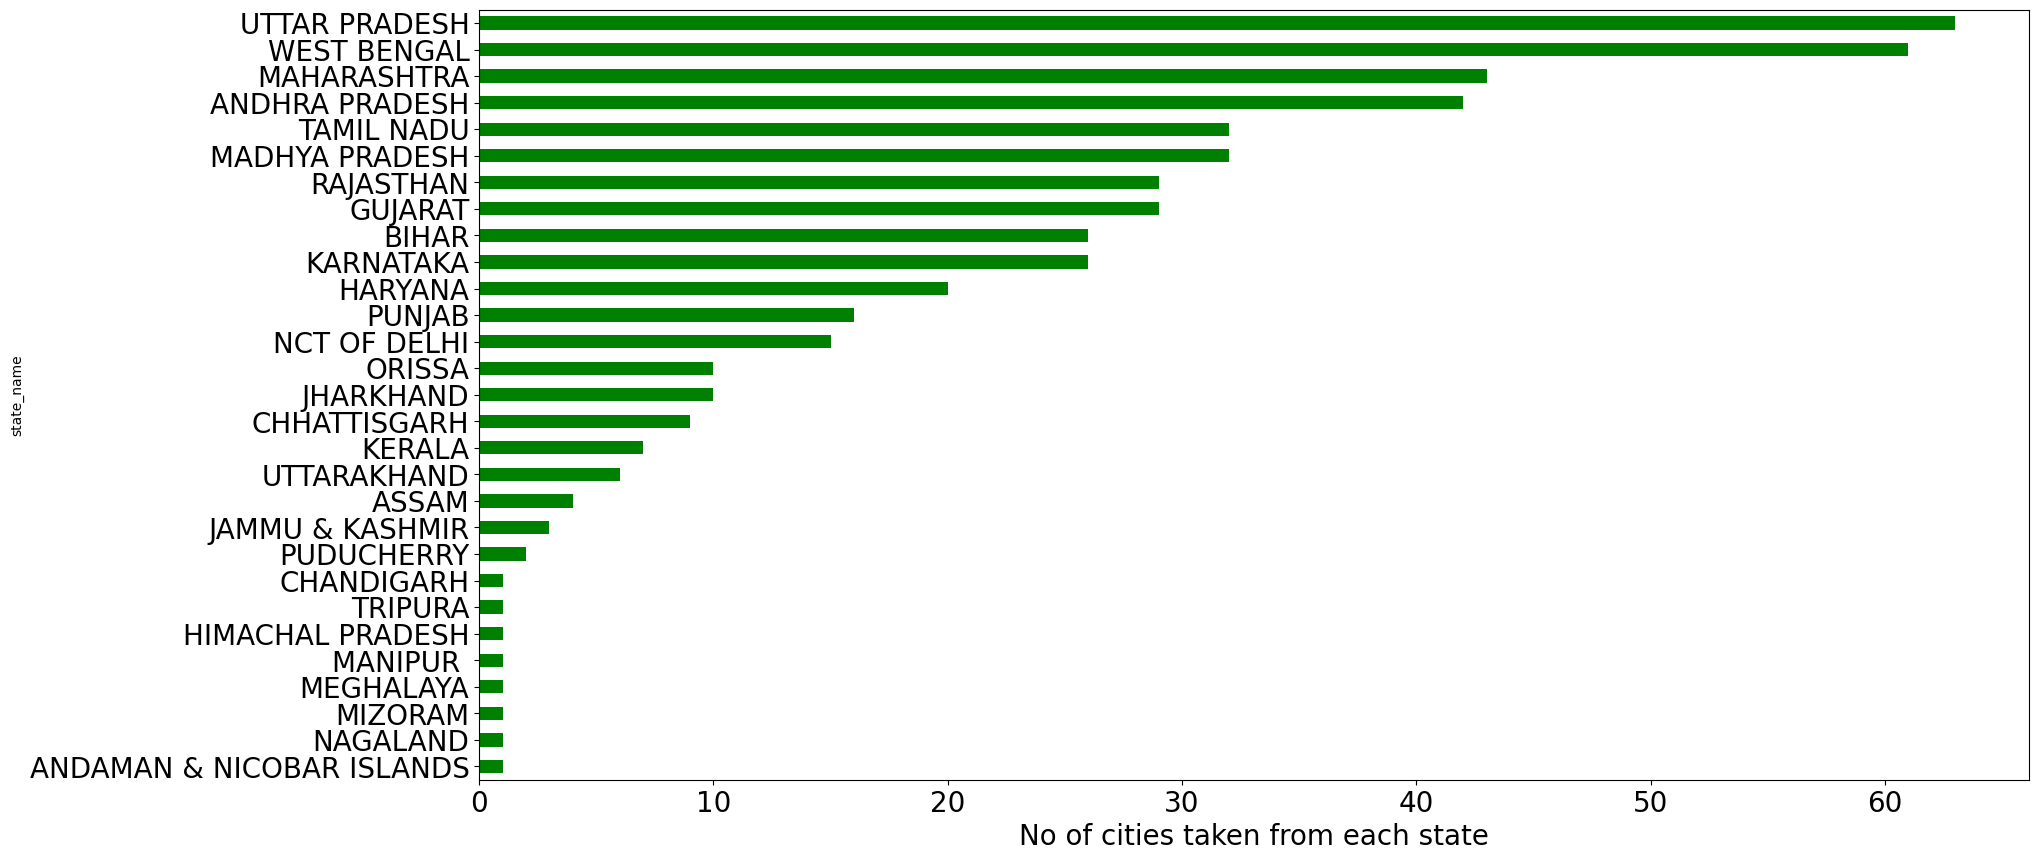

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,10))
states = data.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20,color='green')
plt.xlabel('No of cities taken from each state', fontsize = 20)
plt.show ()

**Splitting location into lattitude and longitude for better and confortable visualization**

In [15]:
data['lattitude'] = data['location'].apply(lambda x: x.split(',')[0])
data['longitude'] = data['location'].apply(lambda x: x.split(',')[1])
data.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,lattitude,longitude
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,30.1452928,74.1993043
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,21.257584,77.5086754
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,19.0809075,79.560344
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,22.7834741,86.1576889
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,15.6322227,77.2728368


**Let us know, what are the top 20 cities in population**

In [16]:
sorted_data = data.sort_values(by='population_total', ascending=False)

# Select the top 20 cities
top_20_cities = sorted_data.head(20)

print(top_20_cities[['name_of_city', 'population_total']])

           name_of_city  population_total
185     Greater Mumbai           12478447
141              Delhi           11007835
72            Bengaluru           8425970
184  Greater Hyderabad            6809970
7            Ahmadabad            5570585
119            Chennai            4681087
274            Kolkata            4486679
449              Surat            4462002
380               Pune            3115431
225             Jaipur            3073350
288            Lucknow            2815601
251             Kanpur            2767031
334             Nagpur            2405421
221             Indore            1960631
456              Thane            1818872
91              Bhopal            1795648
487       Visakhapatnam           1730320
373   Pimpri Chinchwad            1729359
371              Patna            1683200
479           Vadodara            1666703


In [17]:
state_literacy_effective = data[["state_name","effective_literacy_rate_total","effective_literacy_rate_male","effective_literacy_rate_female"]].groupby("state_name").agg({"effective_literacy_rate_total":np.average,"effective_literacy_rate_male":np.average,"effective_literacy_rate_female":np.average})
state_literacy_effective.head()

,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female
state_name,,,
ANDAMAN & NICOBAR ISLANDS,89.760000,92.790000,86.340000
ANDHRA PRADESH,80.927857,86.780952,75.101429
ASSAM,91.512500,94.407500,88.470000
BIHAR,80.867692,86.225769,74.826154
CHANDIGARH,86.770000,90.810000,81.880000


In [18]:
state_literacy_effective.shape

(29, 3)

**Comparing effective literacy rate , effective literacy rate of males , effective literacy rate of female for all states**

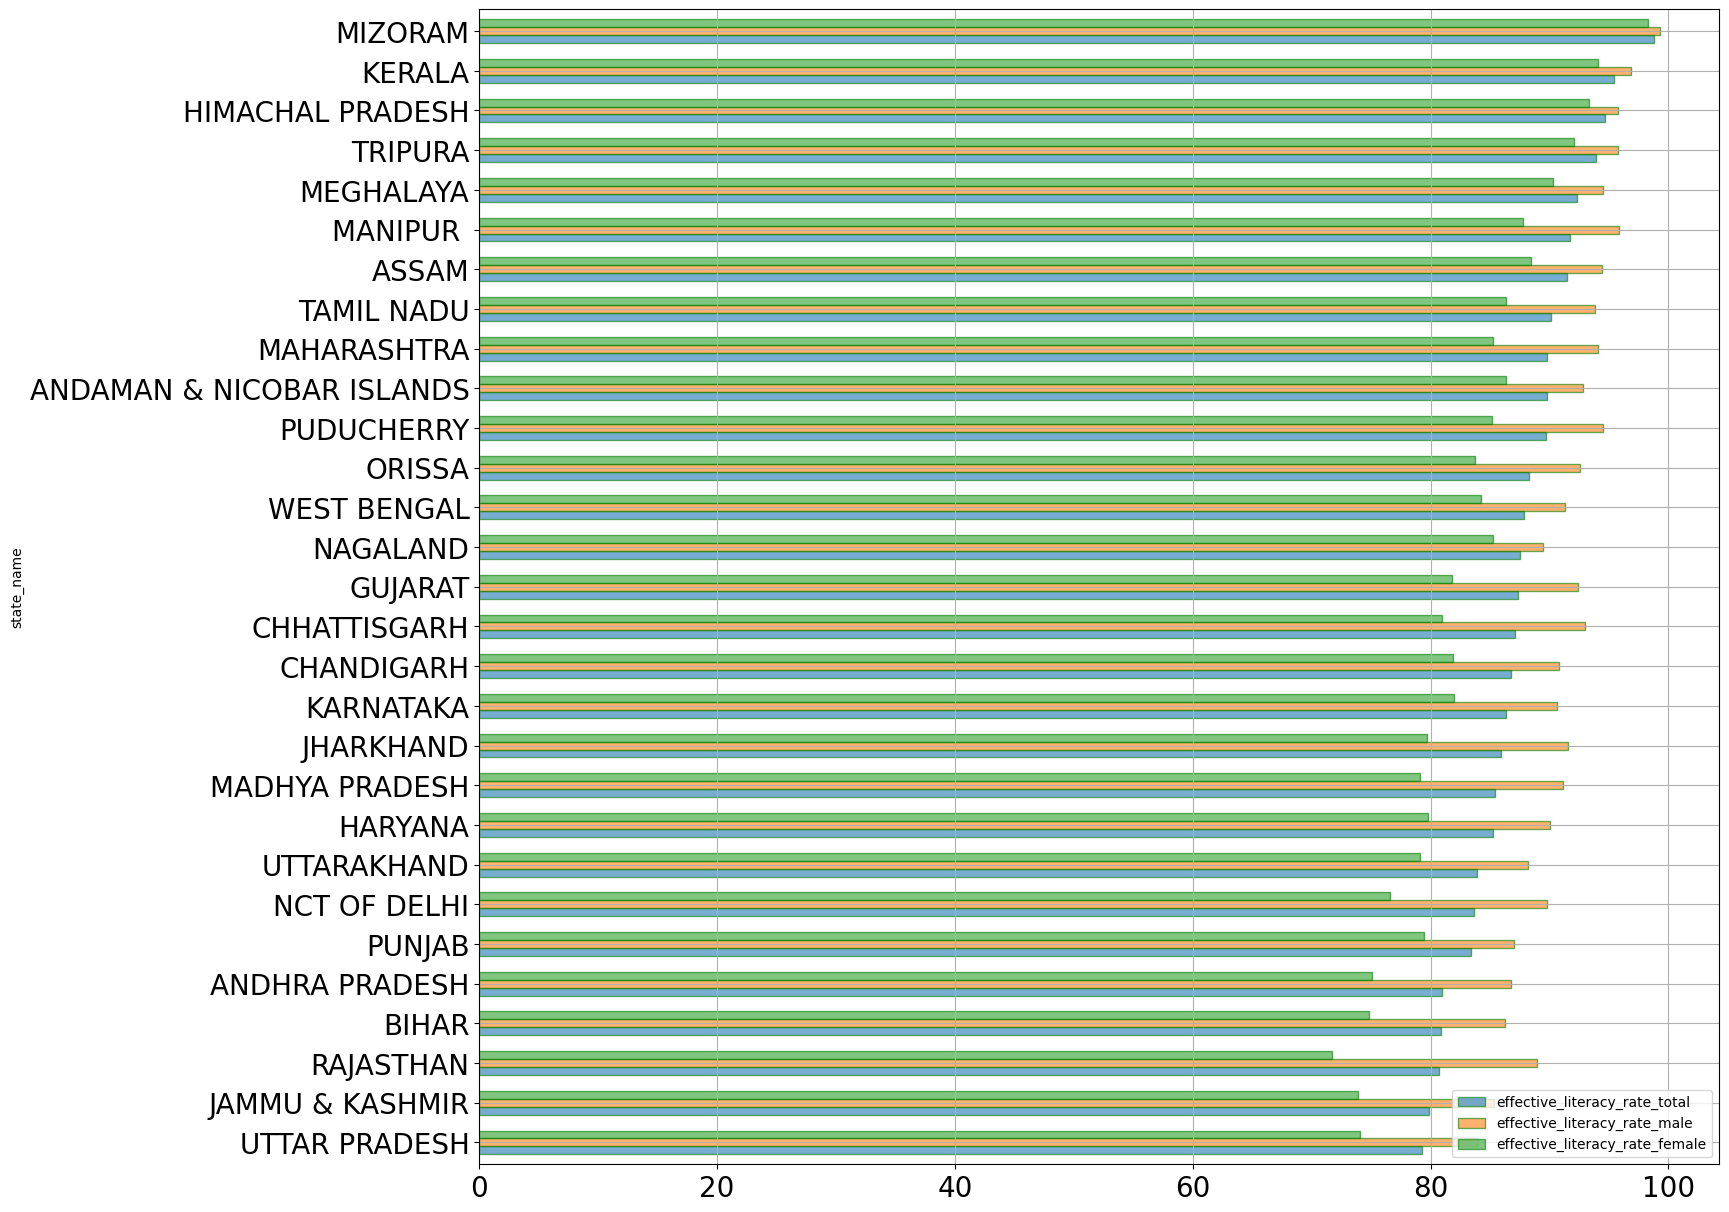

In [19]:
import matplotlib.pyplot as plt
state_literacy_effective_sort= state_literacy_effective.sort_values("effective_literacy_rate_total", ascending=True)
state_literacy_effective_sort.plot(kind="barh",grid=True,figsize=(16,15),alpha = 0.6,width=0.6,stacked = False,edgecolor="g",fontsize = 20)
plt.legend()
plt.show ()

**Comparing state graduate , male graduate,female graduate for all states**

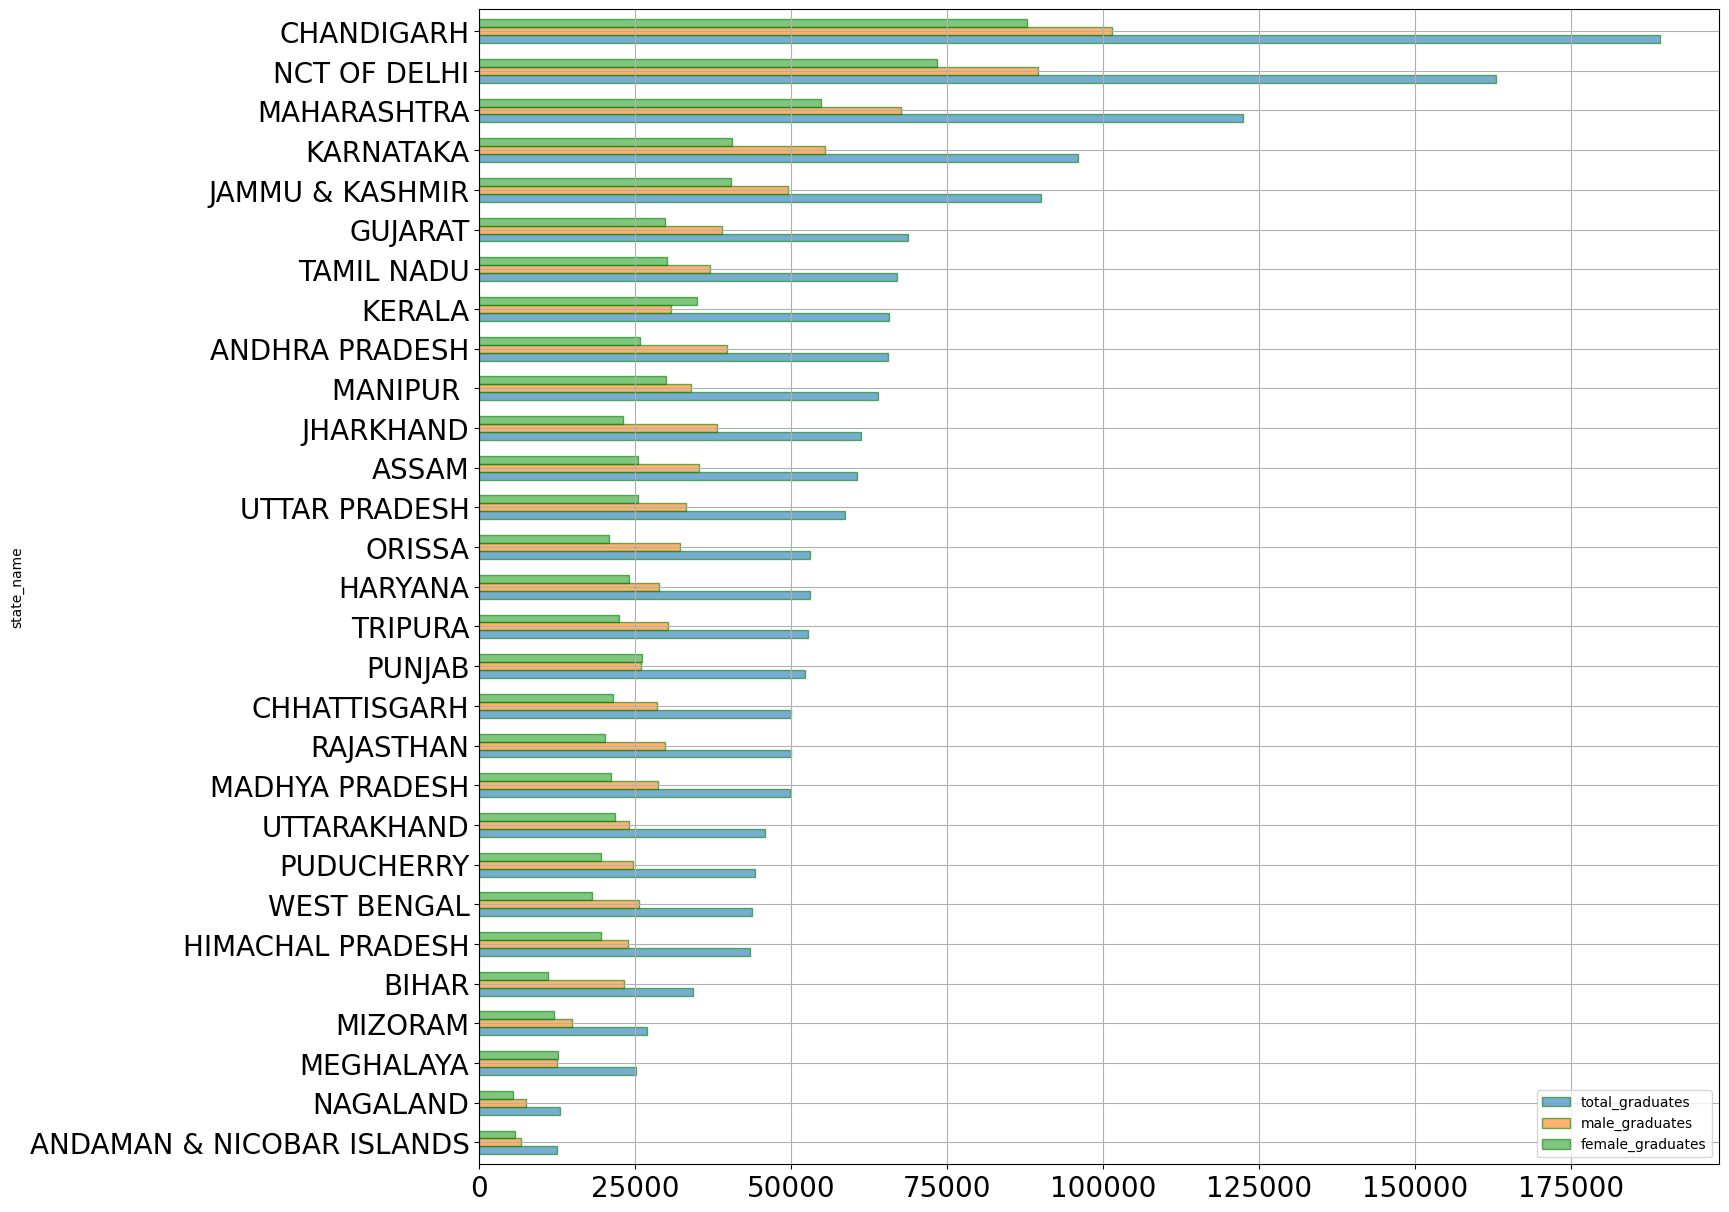

In [20]:
import matplotlib.pyplot as plt
state_graduates  = data[["state_name","total_graduates","male_graduates","female_graduates"]].groupby("state_name").agg({"total_graduates":np.average,"male_graduates":np.average,"female_graduates":np.average})
state_graduates.sort_values("total_graduates", ascending=True).plot(kind="barh",grid=True,figsize=(16,15),alpha = 0.6,width=0.6,stacked = False,edgecolor="g",fontsize = 20)
plt.legend()
plt.show ()

**Locating the cities , having graduates above 1 lakh**

In [21]:
graduates_above_1lakh = data[((data.total_graduates > 100000))]
graduates_above_1lakh.shape

(64, 24)

**Locating the cities , having total effective literacy rate above 90**

In [22]:
effective_literacy_rate_above_90 = data[((data.effective_literacy_rate_total > 90))]
effective_literacy_rate_above_90

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,lattitude,longitude
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,21.257584,77.5086754
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496,23.831457,91.2867777
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829,19.0952075,74.7495916
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932,23.727107,92.7176389
12,Akola,27,MAHARASHTRA,5,427146,218184,208962,46500,24488,22012,...,899,91.34,94.78,87.77,"20.7059345,77.0219019",49715,28812,20903,20.7059345,77.0219019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Vadodara,24,GUJARAT,19,1666703,866701,800002,156480,84307,72173,...,856,92.37,95.51,88.99,"22.3071588,73.1812187",279959,153236,126723,22.3071588,73.1812187
480,Valsad,24,GUJARAT,24,114987,58958,56029,9609,5119,4490,...,877,92.70,95.56,89.72,"20.5992349,72.9342451",18980,10382,8598,20.5992349,72.9342451
482,Vasai Virar City,27,MAHARASHTRA,21,1221233,649535,571698,137343,71716,65627,...,915,91.15,94.86,86.90,"19.3919275,72.8397317",129954,70016,59938,19.3919275,72.8397317
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718,20.745319,78.6021946


In [23]:
comparision_population=data[["name_of_city","population_male","population_female"]].sort_values(by=["population_male","population_female"],ascending=[False,False]).head(10)
comparision_population

,name_of_city,population_male,population_female
185,Greater Mumbai,6736815,5741632
141,Delhi,5871362,5136473
72,Bengaluru,4401299,4024671
184,Greater Hyderabad,3500802,3309168
7,Ahmadabad,2935869,2634716
449,Surat,2538243,1923759
274,Kolkata,2362662,2124017
119,Chennai,2357633,2323454
225,Jaipur,1619280,1454070
380,Pune,1602137,1513294


<Axes: xlabel='name_of_city'>

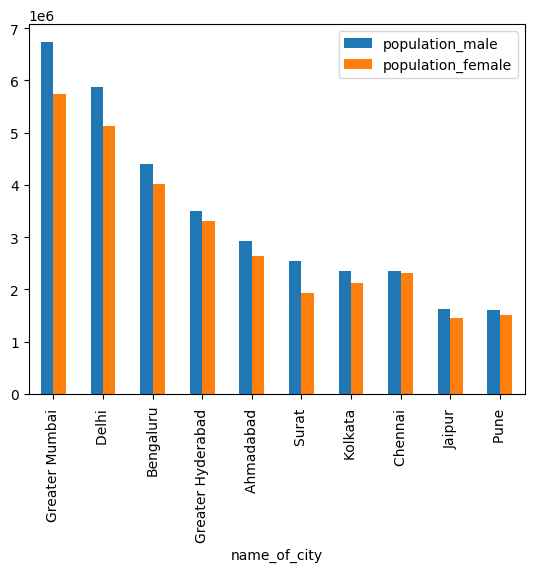

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
comparision_population.plot.bar(x="name_of_city",y=["population_male","population_female"])

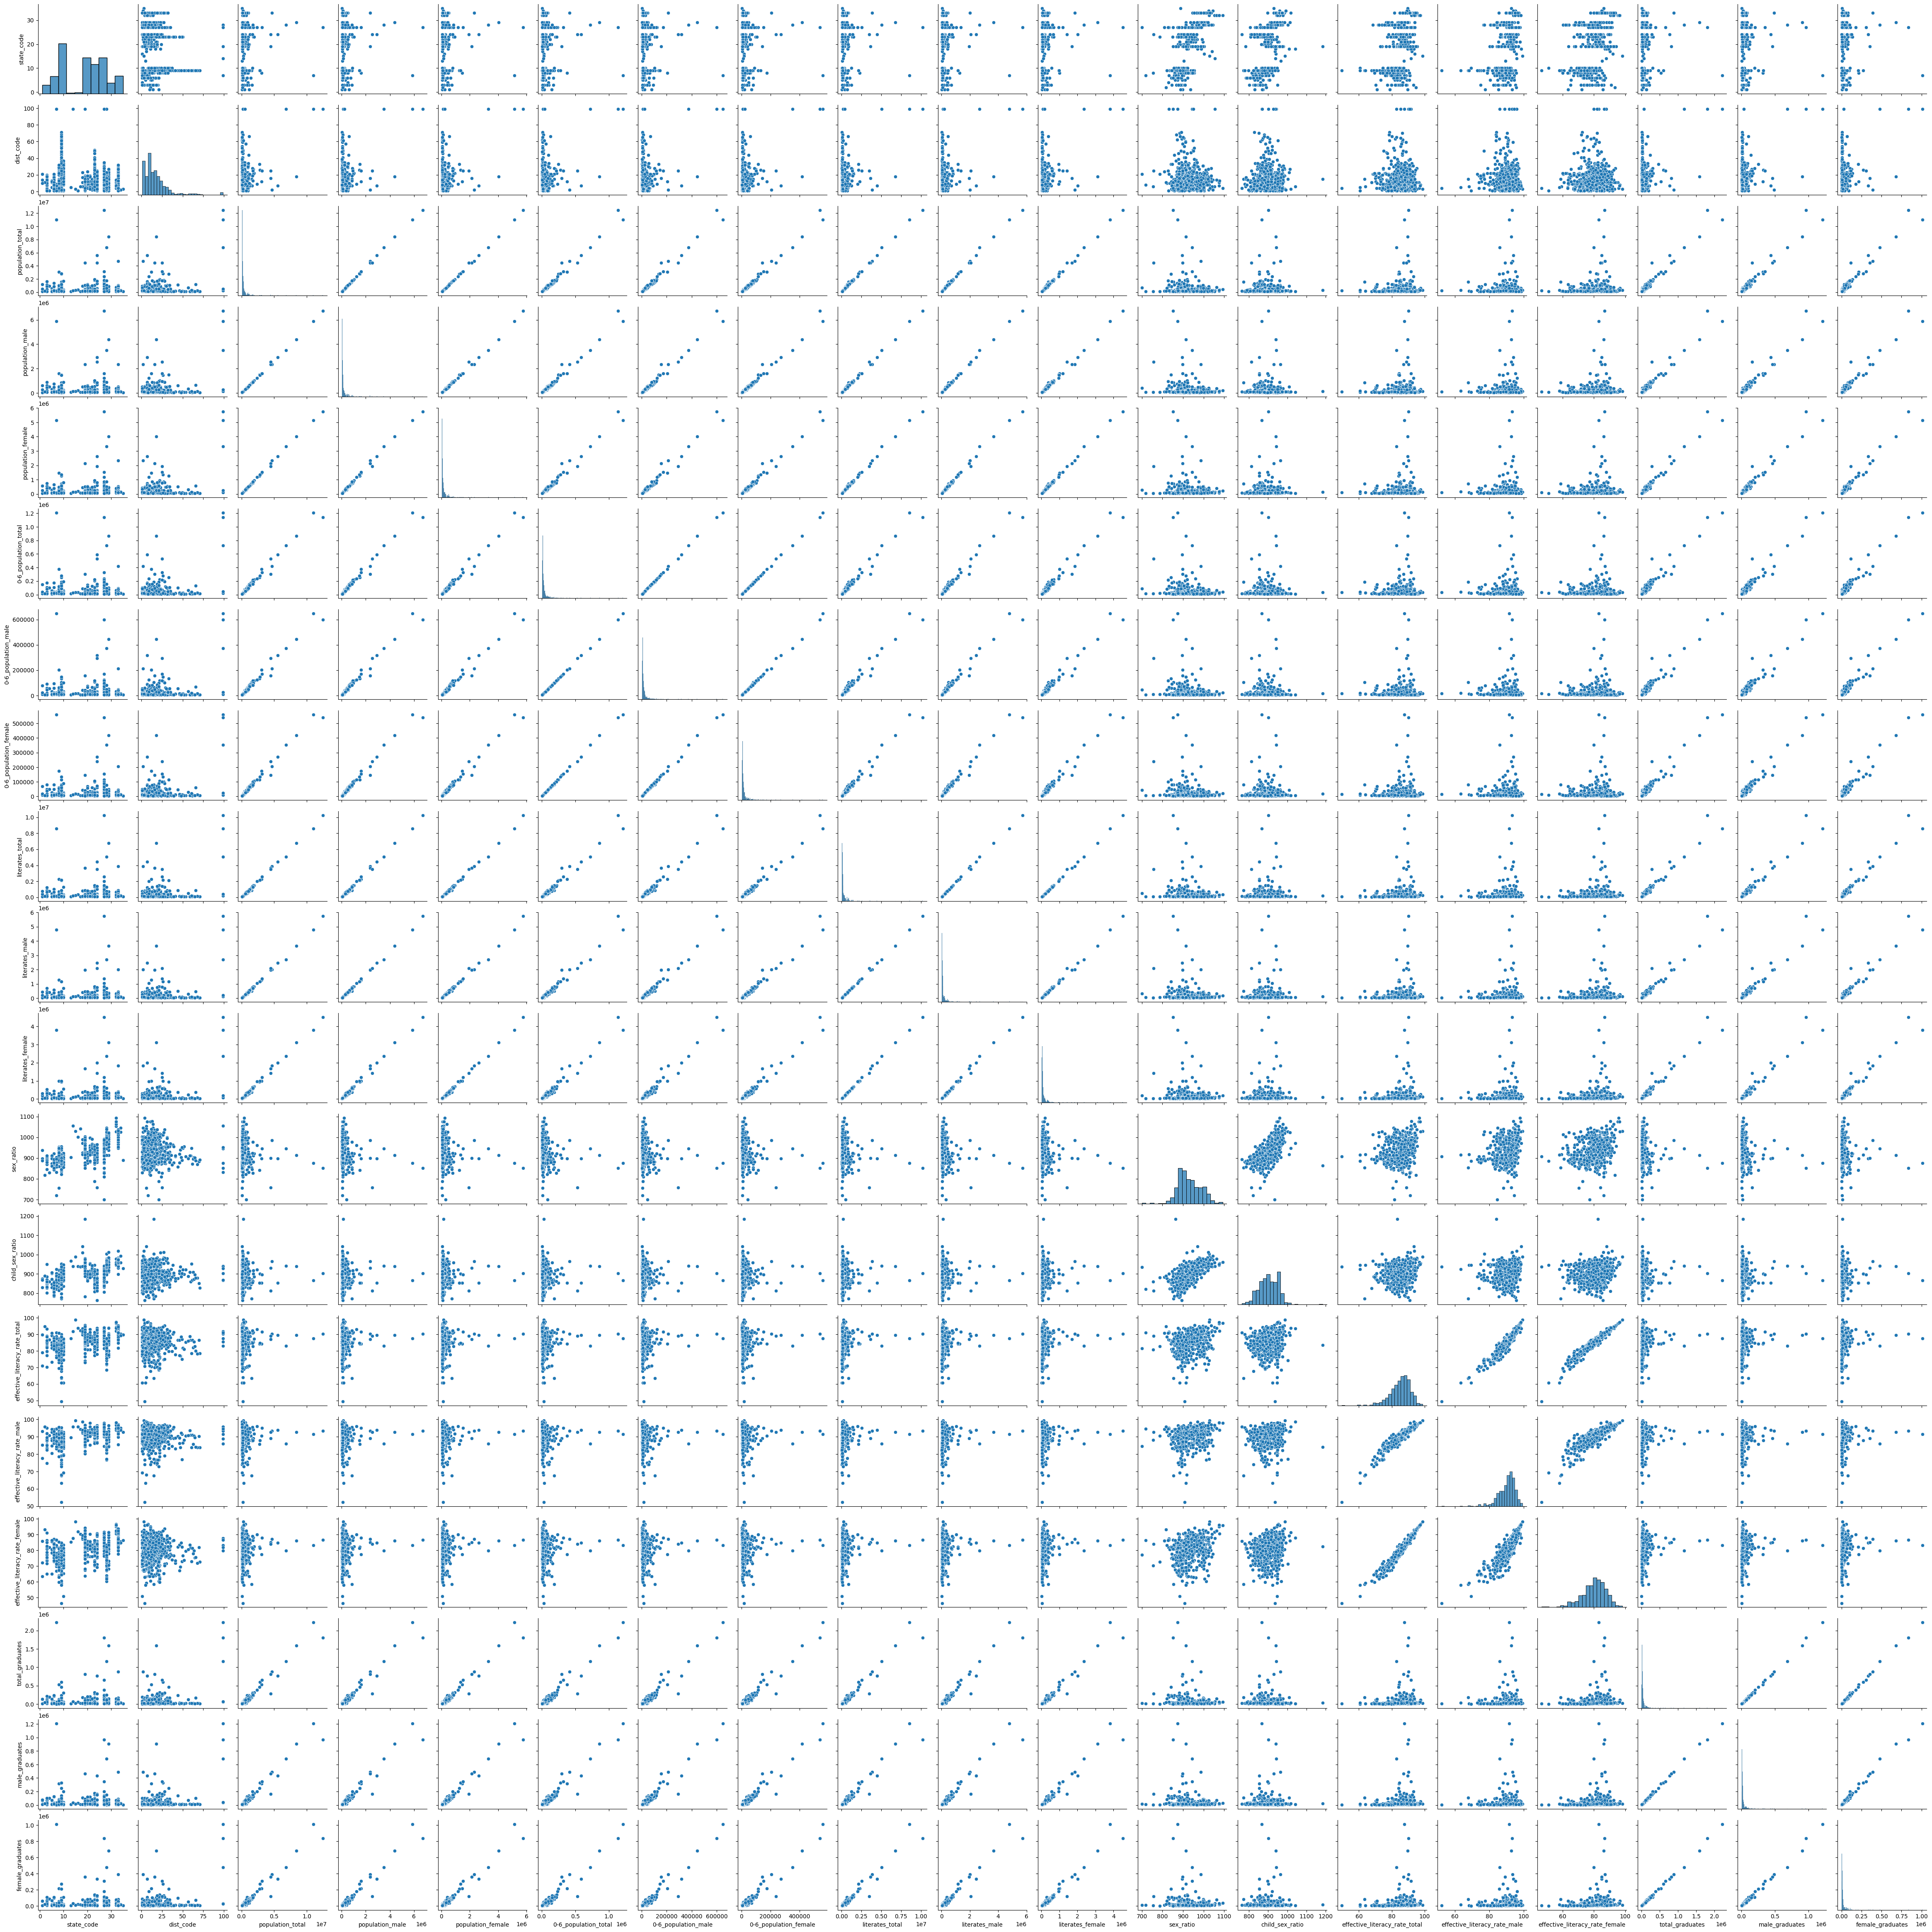

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
#data.hist(figsize=(12, 8))
sns.pairplot(data)
#plt.show()

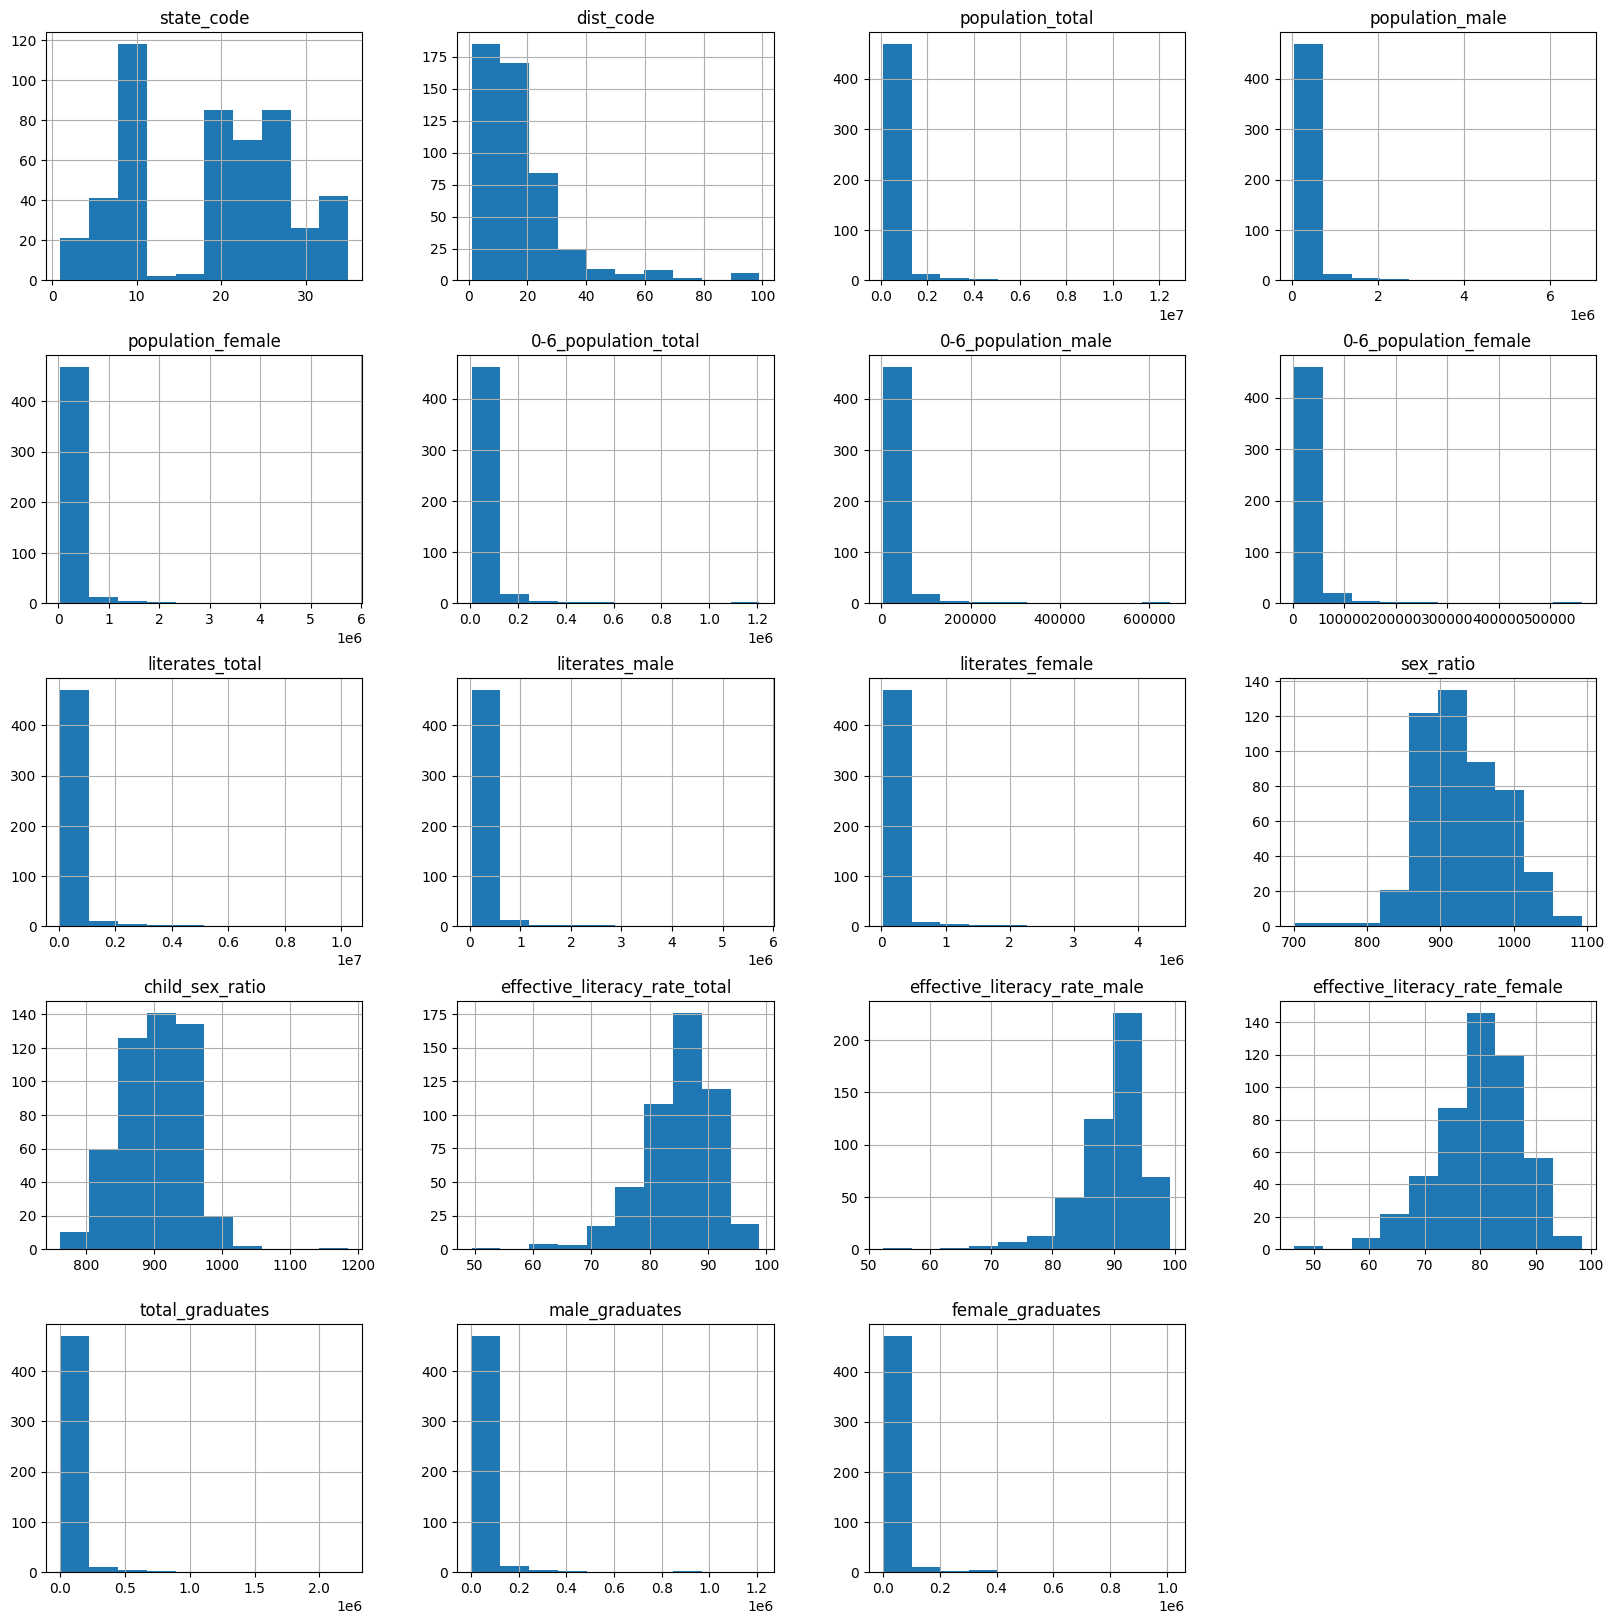

In [41]:
data.hist(figsize=(20,20));

**display top20 name of city with highest population?**

**Is there any relation between sex ratio and Literacy rates? using Scatterplot**

In [35]:
#creating list of (effective_literacy_rate_total,effective_literacy_rate_female,effective_literacy_rate_male)
n=['effective_literacy_rate_total','effective_literacy_rate_male','effective_literacy_rate_female']
#using scatter plot to visualize columns which are in n list
fig = px.scatter(data, x="sex_ratio", y=n)
#show the visualization
fig.show()

**what is the percentage of each state_name in the first 30 row in the data ?**

In [34]:
#storing first 30 row in variable called head30 to use it in visualization
head30 = data.head(30)
#using pie chart to visualize state_name column
fig = px.pie(head30,names='state_name', title='State Name Percentage')
fig.show()

**Is there any relationship between columns?**
we use heatmap because it is a two-dimensional visual representation of data and we can see relation between columns better

<ipython-input-33-9ec954ac26fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(),annot=True)


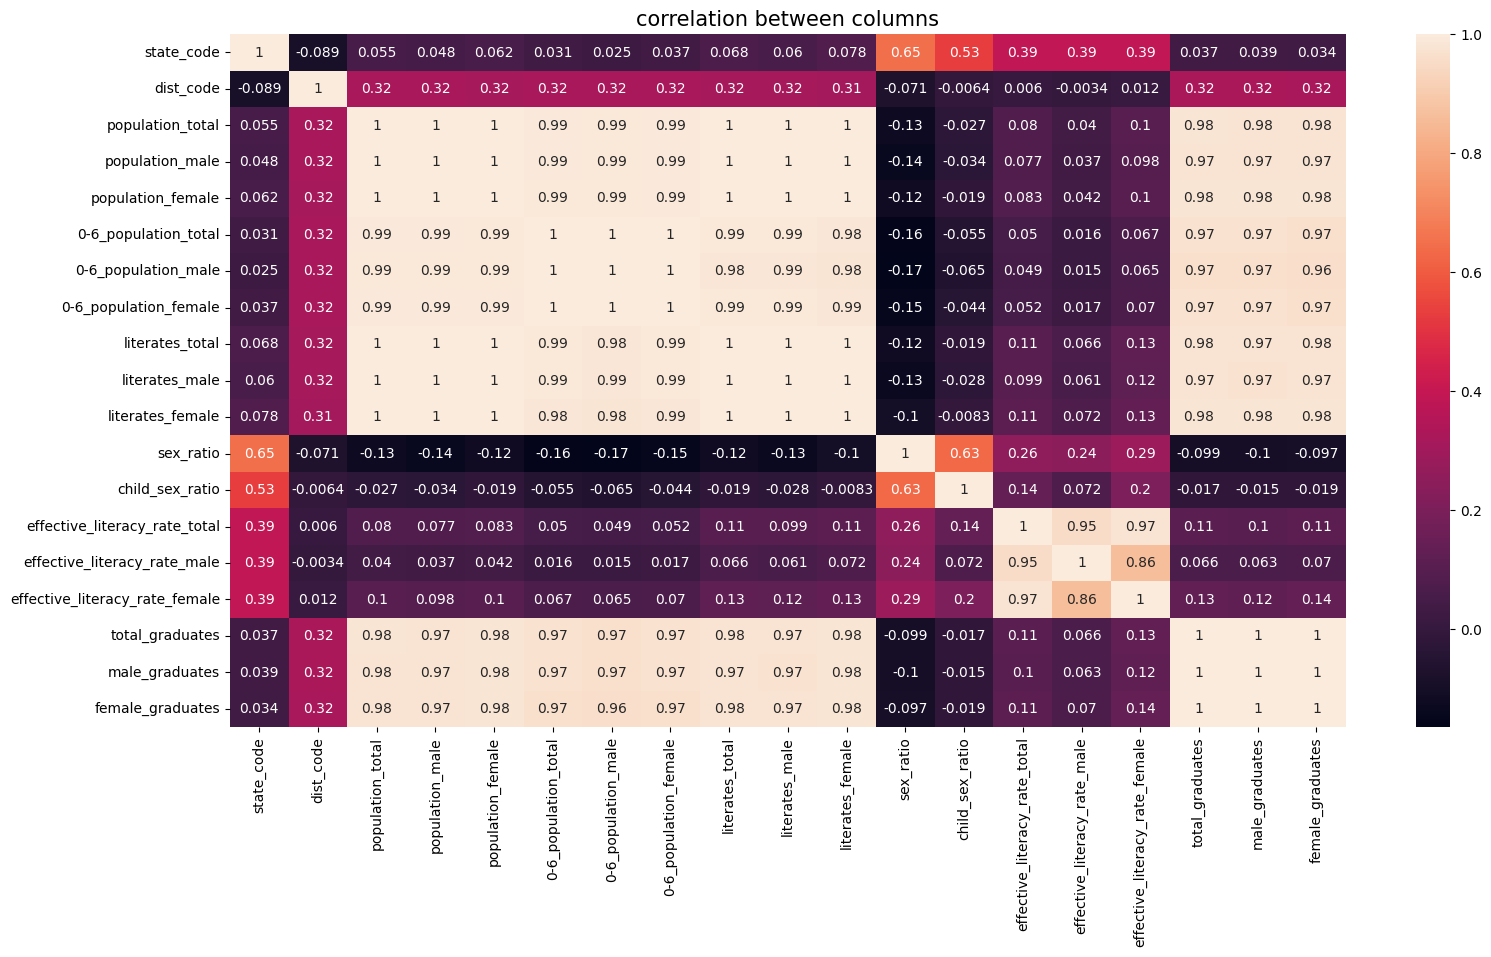

In [33]:
plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(data.corr(),annot=True)
heatmap.set_title('correlation between columns', fontdict={'fontsize':15});